In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Generates n uniform random points within a circle of radius r
# with origin coordinates (x_orig,y_orig)
# quasi-random generator or Sobel
def generate_circle_dist(r,n,x_orig,y_orig):
    r_vals = np.sqrt(np.random.rand(n))*r
    theta = 2*np.pi*np.random.rand(n)
    x = r_vals * np.cos(theta) + x_orig
    y = r_vals * np.sin(theta) + y_orig


    return x,y

# Generates n uniform random points within a square of max_length r
# with origin coordinates (x_orig,y_orig)
# quasi-random generator or Sobel
def generate_square_dist(r,n,x_orig,y_orig):
    x = np.random.rand(n) * r + x_orig - r / 2
    y = np.random.rand(n) * r + y_orig - r / 2
    return x,y

# Function to generate points along a line with a given slope
def generate_line_dist(r, n, x_orig, y_orig):
    x = np.linspace(x_orig - r / 2, x_orig + r / 2, n)
    slope = 1 if np.random.random() < 0.5 else -1
    slope = slope * np.random.rand()
    y = slope * (x - x_orig) + y_orig
    return x, y


def generate_concentric_dist(r, n, x_orig, y_orig, num):
    if num == 0:
        r_vals = np.sqrt(np.random.rand(n)) * r
        theta = 2 * np.pi * np.random.rand(n)
        x = r_vals * np.cos(theta) + x_orig
        y = r_vals * np.sin(theta) + y_orig
    else:
        r_inner = num * (r + np.random.rand() * r)  # Random inner radius greater than the original radius
        r_outer = r_inner + np.random.rand() * r  # Random outer radius greater than the inner radius
        r_vals = np.sqrt(np.random.rand(n) * (r_outer**2 - r_inner**2) + r_inner**2)
        theta = 2 * np.pi * np.random.rand(n)
        x = r_vals * np.cos(theta) + x_orig
        y = r_vals * np.sin(theta) + y_orig

    
    return x, y



# Visualize clusters for an arbitrary number of circles
def Visualize_Clusters(circle_data,dataset):
    plt.figure()
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    
    for i, (c_x, c_y) in enumerate(circle_data):
        plt.plot(c_x, c_y, '.', color=colors[i % len(colors)])
    
    plt.title(f'{len(circle_data)} {dataset}')
    plt.show()
    
    
def sort_by_component(list_clust,component):
    sorted_points = sorted(list_clust, key=lambda tup:tup[component])
    return sorted_points 

def generate_list_of_clusters(r,n,origins,
                                  sorting_component,visualize,dataset):
    circle_data = []    
    num = 0
    for x_orig, y_orig in origins:

        if dataset == 'Circles_overlapped':
            c_x, c_y = generate_circle_dist(r,n,x_orig, y_orig)
        if dataset == 'Squares':
            c_x, c_y = generate_square_dist(r,n,x_orig, y_orig)
        if dataset == 'Lines':
            c_x, c_y = generate_line_dist(r,n,x_orig, y_orig)

        if num==0:
            x_concentric,y_concentric = x_orig,y_orig
        if dataset == 'Concentric':
            c_x, c_y = generate_concentric_dist(r,n,x_concentric,y_concentric,num)
            num+=1
        circle_data.append((c_x, c_y)) 
        
    # # Initialize new_circle_data as a list of empty lists
    # new_circle_data = [([], []) for _ in origins]
    # for c_x, c_y in circle_data:
    #     for x, y in zip(c_x, c_y):
    #         distances = [(x - x_orig) ** 2 + (y - y_orig) ** 2 for x_orig, y_orig in origins]
    #         closest_circle = np.argmin(distances)
    #         new_circle_data[closest_circle][0].append(x)
    #         new_circle_data[closest_circle][1].append(y)

    if visualize==True:
        Visualize_Clusters(circle_data,dataset)
        
    list_of_clusters = [(x, y) for c_x, c_y in circle_data for x, y in zip(c_x, c_y)]
    list_of_origins = origins

    sorted_by_comp = list_of_clusters
    origins_sorted_by_comp = list_of_origins
  
    # sorted_by_comp = sort_by_component(list_of_clusters,sorting_component)
    # origins_sorted_by_comp = sort_by_component(list_of_origins,sorting_component)
    
    return sorted_by_comp,origins_sorted_by_comp


def generate_corrected_list_of_clusters(r,n,origins,
                                          sorting_component,visualize):
    circle_data = []    


    for x_orig, y_orig in origins:
        c_x, c_y = generate_circle_dist(r, n, x_orig, y_orig)
        circle_data.append((c_x, c_y)) 

    # Initialize new_circle_data as a list of empty lists
    new_circle_data = [([], []) for _ in origins]
    for c_x, c_y in circle_data:
        for x, y in zip(c_x, c_y):
            distances = [(x - x_orig) ** 2 + (y - y_orig) ** 2 for x_orig, y_orig in origins]
            closest_circle = np.argmin(distances)
            new_circle_data[closest_circle][0].append(x)
            new_circle_data[closest_circle][1].append(y)
    
    dataset = 'Circles'        
    if visualize==True:
        Visualize_Clusters(new_circle_data,dataset)

    list_of_clusters = [(x, y) for c_x, c_y in new_circle_data for x, y in zip(c_x, c_y)]
    list_of_origins = origins

    sorted_by_comp = list_of_clusters
    origins_sorted_by_comp = list_of_origins
    
    # sorted_by_comp = sort_by_component(list_of_clusters,sorting_component)
    # origins_sorted_by_comp = sort_by_component(list_of_origins,sorting_component)
    
    return sorted_by_comp,origins_sorted_by_comp
   
    
def Create_Single_Example(sorted_by_comp,origins_sorted_by_comp):
    list_examples = []
    
    for x, y in sorted_by_comp:
        list_examples.extend([x, y])
    for x, y in origins_sorted_by_comp:
        list_examples.extend([x, y])
    
    example = np.array(list_examples)
    n = len(example)
    
    # Normalization
    example[0:n:2] = (example[0:n:2] - np.min(example[0:n:2])) / (np.max(example[0:n:2]) - np.min(example[0:n:2]))
    example[1:n:2] = (example[1:n:2] - np.min(example[1:n:2])) / (np.max(example[1:n:2]) - np.min(example[1:n:2]))
    
    
    return example

[(10, 5), (1, 8), (7, 7), (5, 10), (0, 6)]


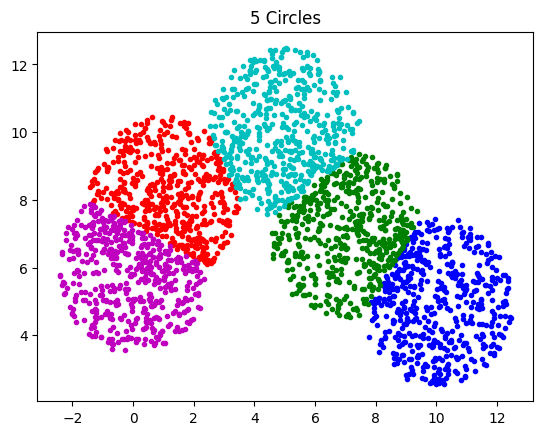

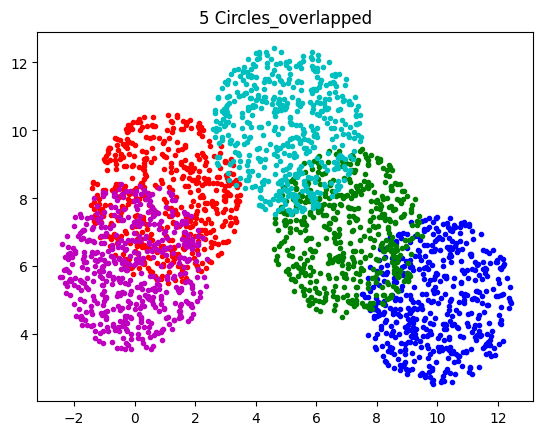

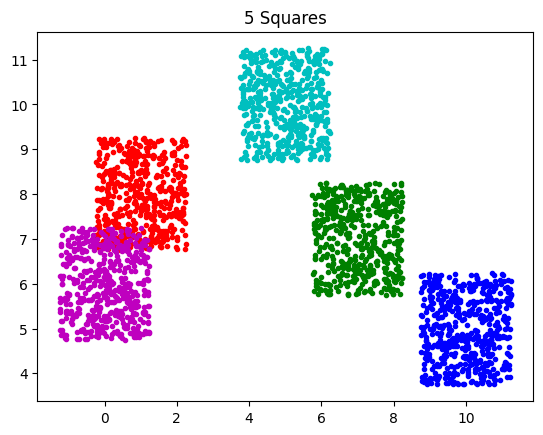

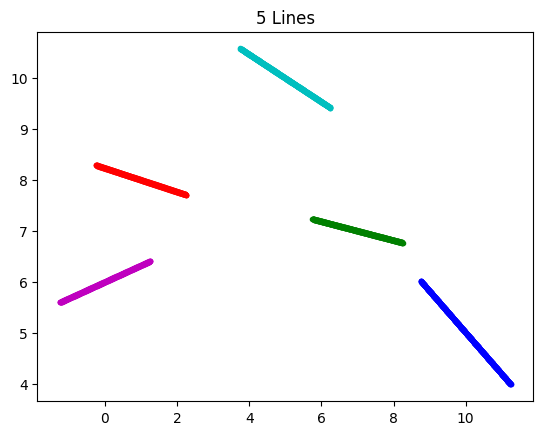

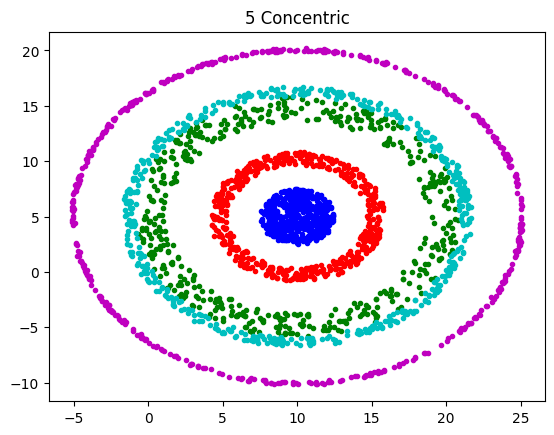

(5010,)


In [3]:
#sorted_by_y = sort_by_component(list_of_clusters,1)
#origins_sorted_by_y = sort_by_component(list_of_origins,1)

import random

def generate_random_origins(size):
    origins = []
    for _ in range(size):
        x = random.randint(0, 10)  # You can change the range as needed
        y = random.randint(0, 10)  # You can change the range as needed
        origins.append((x, y))
    return origins

# Example usage
size = 5  # Change this to any size you want
random_origins = generate_random_origins(size)
print(random_origins)
r = 2.5
n = 500
origins = random_origins
# c1_x_orig = 5
# c1_y_orig = 5
# c2_x_orig = 7
# c2_y_orig = 5


sorting_comp = 0
visualize = 1

sorted_by_comp,origins_sorted_by_comp =  generate_corrected_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize)


dataset = 'Circles_overlapped'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)

dataset = 'Squares'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)

dataset = 'Lines'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)
 

dataset = 'Concentric'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)    
example = Create_Single_Example(sorted_by_comp,origins_sorted_by_comp)
print(example.shape)


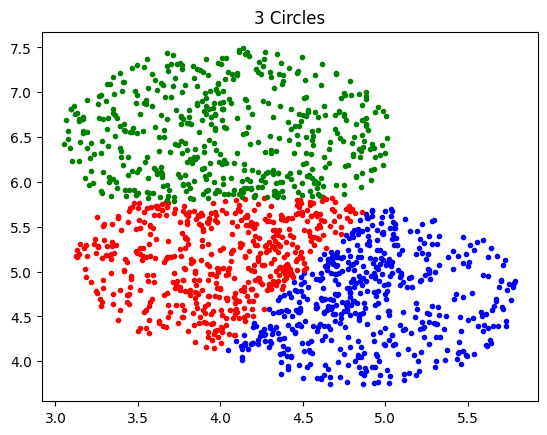

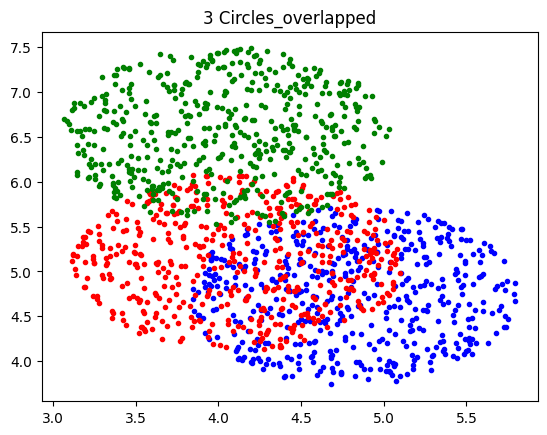

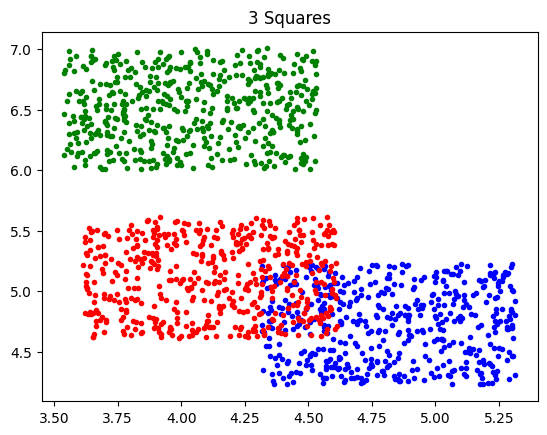

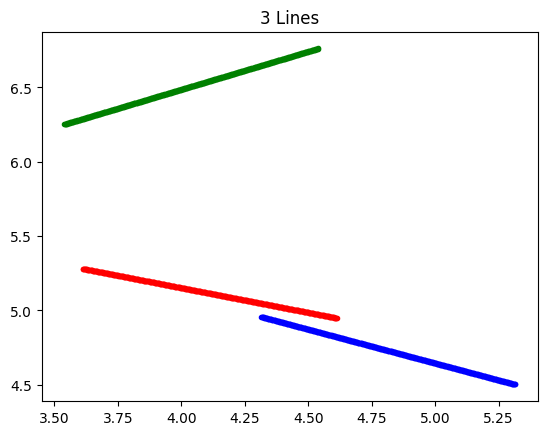

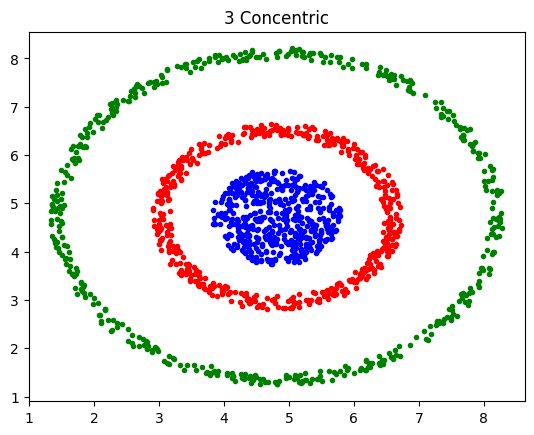

<class 'list'>


In [9]:
def generate_origins(k, intervals):
    origins = []
    
    for i in range(k):
        x_interv = intervals[i][0]
        y_interv = intervals[i][1]
        x_orig = x_interv[0] + np.random.rand() * (x_interv[1] - x_interv[0])
        y_orig = y_interv[0] + np.random.rand() * (y_interv[1] - y_interv[0])
        origins.append((x_orig, y_orig))
    
    return origins

# Example usage
intervals = [
    ([2, 5], [2, 5]),  # intervals for origin 1
    ([3, 6], [3, 6]),  # intervals for origin 2
    ([4, 7], [4, 7]),  # intervals for origin 2
    ([0, 3.5], [0, 3.5]),  # intervals for origin 2
    # Add more intervals here for additional origins
]

k = 3  # Number of origins to generate
origins = generate_origins(k, intervals)



r = 1.0
n = 500
number_examples_train = 400
number_examples_test = 100
visualize = 0
sorting_comp=0

sorting_comp = 0
visualize = 1

sorted_by_comp,origins_sorted_by_comp =  generate_corrected_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize)


dataset = 'Circles_overlapped'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)

dataset = 'Squares'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)

dataset = 'Lines'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)
 

dataset = 'Concentric'
sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,
                                                                   origins,
                                                                   sorting_comp,
                                                                   visualize,dataset)  
print(type(sorted_by_comp) )
example = Create_Single_Example(sorted_by_comp,origins_sorted_by_comp)


In [17]:
def Create_DB_Clusterings(r,n,k,intervals,
                              sorting_comp, number_examples,
                              visualize,dataset):
    
    for i in range(number_examples):
        origins = []
        
        for l in range(k):
            x_interv = intervals[l][0]
            y_interv = intervals[l][1]
            x_orig = x_interv[0] + np.random.rand() * (x_interv[1] - x_interv[0])
            y_orig = y_interv[0] + np.random.rand() * (y_interv[1] - y_interv[0])
            origins.append((x_orig, y_orig))
            
        if dataset == 'Circles_original':
            sorted_by_comp,origins_sorted_by_comp =  generate_corrected_list_of_clusters(r,n,origins,
                                                                    sorting_comp,
                                                                    visualize)
        if dataset == 'Circles_overlapped':
            sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,origins,
                                                                    sorting_comp,
                                                                    visualize,dataset)
        if dataset == 'Squares':
            sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,origins,
                                                                    sorting_comp,
                                                                    visualize,dataset)
        if dataset == 'Lines':
            sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,origins,
                                                                    sorting_comp,
                                                                    visualize,dataset)
            
        if dataset == 'Concentric':
            sorted_by_comp,origins_sorted_by_comp =  generate_list_of_clusters(r,n,origins,
                                                                    sorting_comp,
                                                                    visualize,dataset)
        example = Create_Single_Example(sorted_by_comp,origins_sorted_by_comp)

        if i==0:
            matrix_examples = example
        else:
            matrix_examples = np.vstack((matrix_examples,example))
            
    return matrix_examples 

def Create_DataSets(r,n,k,intervals,
                    number_examples_train,number_examples_test,
                    visualize,sorting_comp,dataset,n_clusters):
    
    matrix_examples = Create_DB_Clusterings(r,n,k,intervals,
                              sorting_comp, number_examples_train,
                              visualize,dataset)

    np.save('../datasets/new_clusters_data_train_sorting_'+str(dataset)+'_'+str(sorting_comp)+'_'+str(n_clusters),matrix_examples)



    matrix_examples = Create_DB_Clusterings(r,n,k,intervals,
                              sorting_comp, number_examples_test,
                              visualize,dataset)

    np.save('../datasets/new_clusters_data_test_sorting_'+str(dataset)+'_'+str(sorting_comp)+'_'+str(n_clusters),matrix_examples)

In [18]:
# Example usage
intervals = [
    ([2.5, 5], [2.5, 5]),  # intervals for origin 1
    ([2.5, 5], [2.5, 5]),  # intervals for origin 2
    ([0, 3.5], [0, 3.5]),  # intervals for origin 2
    ([0, 3.5], [0, 3.5]),  # intervals for origin 2
    # Add more intervals here for additional origins
]

k = 3  # Number of origins to generate


r = 1.0
n = 500
number_examples_train = 400
number_examples_test = 100
visualize = 0
sorting_comp=0
n_clusters = 3

dataset = 'Circles_original'
Create_DataSets(r,n,k,intervals,
                    number_examples_train,number_examples_test,
                    visualize,sorting_comp,dataset,n_clusters)

dataset = 'Circles_overlapped'
Create_DataSets(r,n,k,intervals,
                    number_examples_train,number_examples_test,
                    visualize,sorting_comp,dataset,n_clusters)


dataset = 'Squares'
Create_DataSets(r,n,k,intervals,
                    number_examples_train,number_examples_test,
                    visualize,sorting_comp,dataset,n_clusters)


dataset = 'Lines'
Create_DataSets(r,n,k,intervals,
                    number_examples_train,number_examples_test,
                    visualize,sorting_comp,dataset,n_clusters)

dataset = 'Concentric'
Create_DataSets(r,n,k,intervals,
                    number_examples_train,number_examples_test,
                    visualize,sorting_comp,dataset,n_clusters)


In [ ]:
def Create_PCA_Representations(sorting_comp):
    sorting_comp = 0
    train_original_clusters_file = 'new_clusters_data_train_sorting_'+str(sorting_comp)+'.npy'
    train_original_clusters = np.load(train_original_clusters_file)
    test_original_clusters_file = 'new_clusters_data_test_sorting_'+str(sorting_comp)+'.npy'
    test_original_clusters = np.load(test_original_clusters_file)

    pca = PCA(n_components=100)
    pca.fit(train_original_clusters[:,:2000])
    train_PCA_clusters = pca.transform(train_original_clusters[:,:2000])
    test_PCA_clusters = pca.transform(test_original_clusters[:,:2000])
    train_PCA_clusters = np.hstack((train_PCA_clusters,train_original_clusters[:,2000:]))
    test_PCA_clusters = np.hstack((test_PCA_clusters,test_original_clusters[:,2000:]))
    np.save('pca_clusters_data_train_sorting_'+str(sorting_comp),train_PCA_clusters)
    np.save('pca_clusters_data_test_sorting_'+str(sorting_comp),test_PCA_clusters)

sorting_comp = 0
Create_PCA_Representations(sorting_comp)
sorting_comp = 1
Create_PCA_Representations(sorting_comp)